In [27]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [10]:
raw_data = 'resources/mbti_1.csv'
data = pd.read_csv(raw_data)

In [11]:
group_data = data.groupby('type').count()
group_data.sort_values('posts', ascending=False, inplace=True)
print('Personality Types', group_data.index.values)

Personality Types ['INFP' 'INFJ' 'INTP' 'INTJ' 'ENTP' 'ENFP' 'ISTP' 'ISFP' 'ENTJ' 'ISTJ'
 'ENFJ' 'ISFJ' 'ESTP' 'ESFP' 'ESFJ' 'ESTJ']


### This bar chart represents how often each personality type is mentioned in a post

<AxesSubplot:title={'center':'Distibution of the target variable'}, xlabel='type', ylabel='count'>

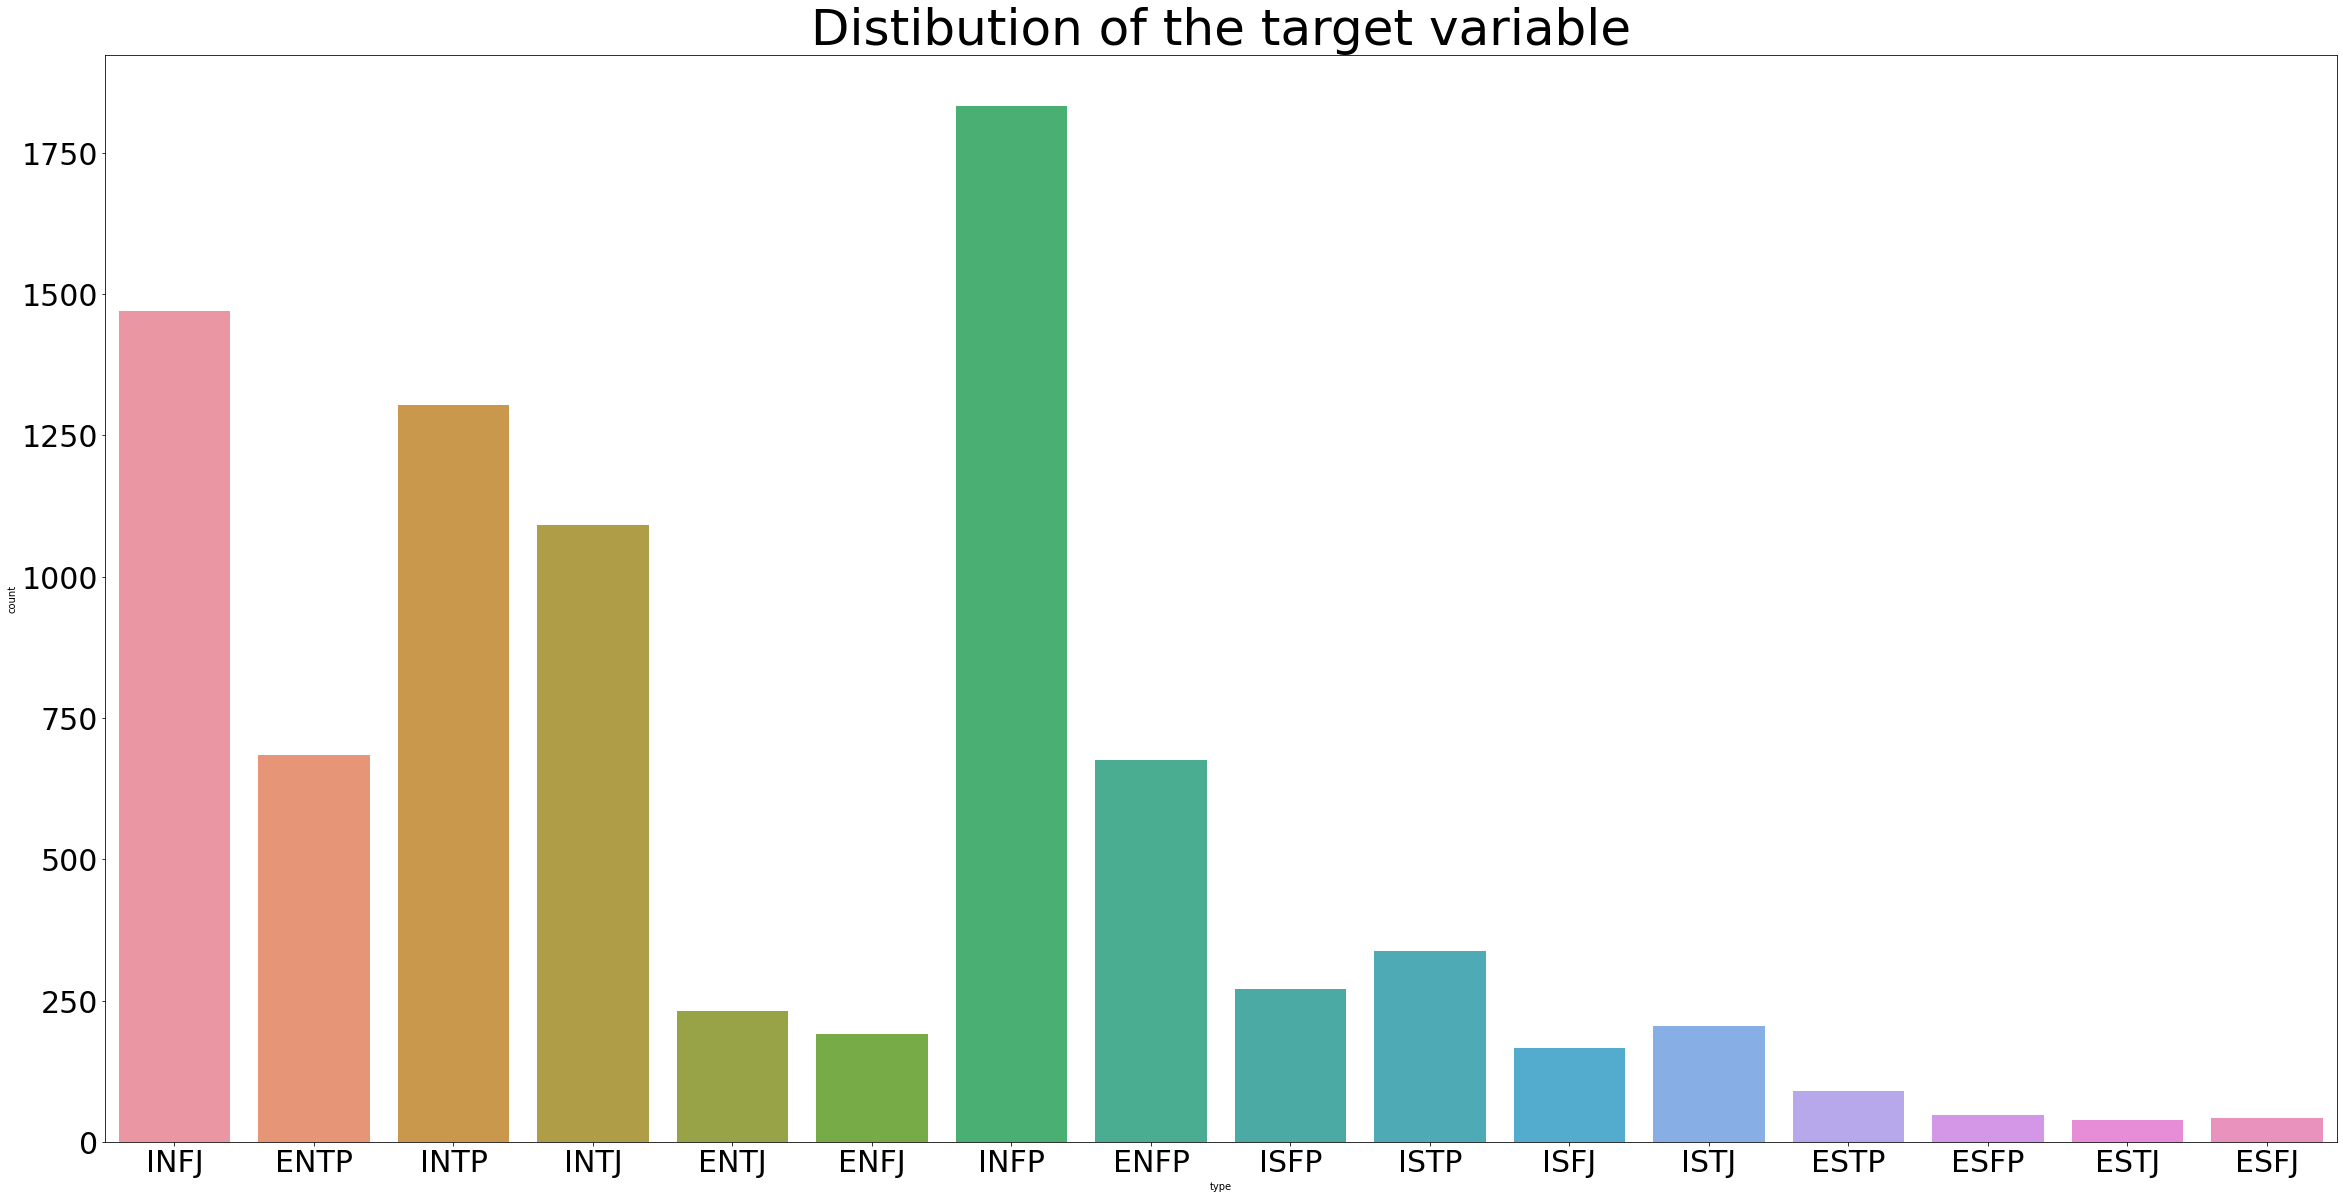

In [12]:
plt.figure(figsize=(40,20))
plt.title("Distibution of the target variable", fontsize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
sns.countplot(data=df, x='type')

### Removing stopwords

In [23]:
stopWords = set(STOPWORDS)
#add each lower case personality type as a stopword
for word in names:
    word.lower()
    stopWords.add(word.lower())
#Remove all of the most common words
moreWords =['lot', 'time', 'love', 'actually', 'seem', 'need', 'infj', 'actually', 'pretty', 'sure', 'thought','type', 'one', 'even', 'someone', 'thing','make', 
            'now', 'see', 'things', 'feel', 'think', 'i', 'people', 'know', '-', "much", "something", "will", "find", "go", "going", "need", 'still', 'though', 
            'always', 'through', 'lot', 'time', 'love', 'really', 'want', 'way', 'never', 'find', 'say', 'it.', 'good', 'me.', 'many', 'first', 'wp', 'go', 
            'really', 'much', 'why', 'youtube', 'right', 'know', 'want', 'tumblr', 'great', 'say', 'well', 'people', 'will', 'something', 'way', 'sure', 
            'especially', 'thank', 'friend', 'good', 'ye', 'person', 'https', 'watch', 'yes', 'got', 'take', 'person', 'life', 'might', 'me', 'me,', 'around', 'best', 'try', 
            'maybe', 'probability', 'usually', 'sometimes', 'trying', 'read', 'us', 'may', 'use', 'work', ':)', 'said', 'two', 'makes', 'little', 'quite','fe', 'u', 'intps', 'probably', 'made', 'it', 'seems', 'look', 'yeah',
           'different', 'come', 'it,', 'friends', 'entps', 'different', 'esfjs', 'look', 'infjs', 'estps', 'kind', 'intjs', 'enfjs', 
            'entjs', 'infps', 'every', 'long', 'tell', 'new', 'jpg']

for i in moreWords:
    stopWords.add(i)

INFJ


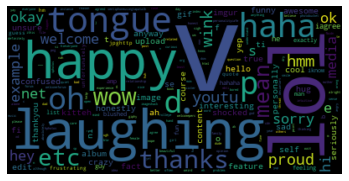

ENTP


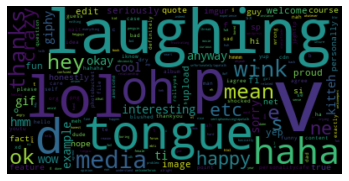

INTP


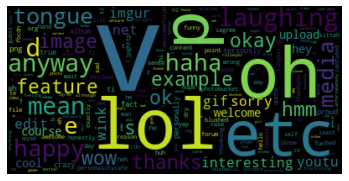

INTJ


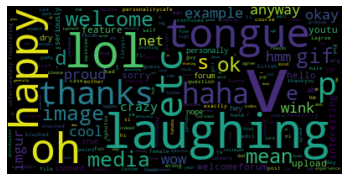

ENTJ


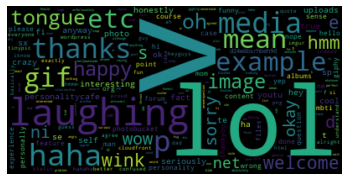

ENFJ


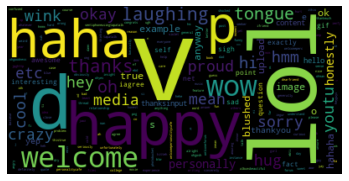

INFP


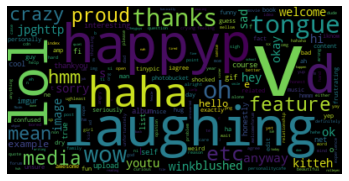

ENFP


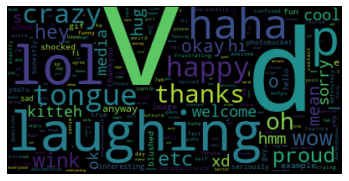

ISFP


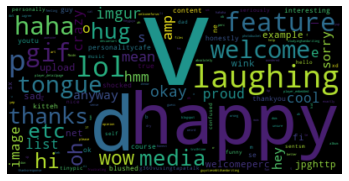

ISTP


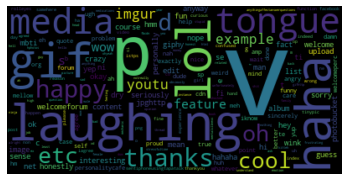

ISFJ


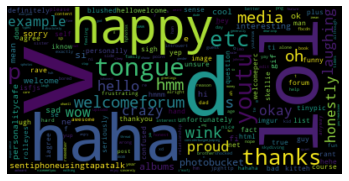

ISTJ


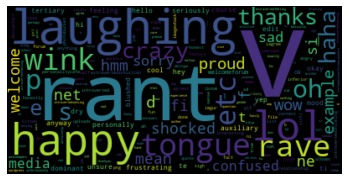

ESTP


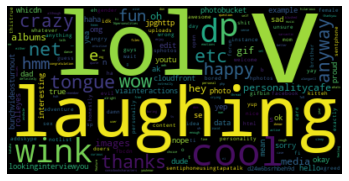

ESFP


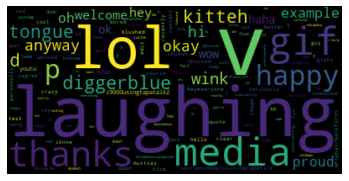

ESTJ


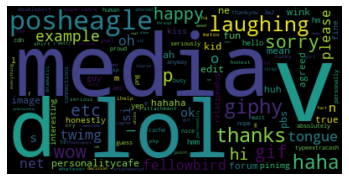

ESFJ


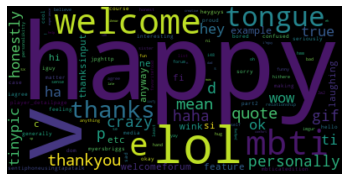

In [24]:
names = data['type'].unique()
i = 0
while i < len(names):
    for name in names:
        print(name)
        #filter by type
        specRows = data['type'] == name
        #combine the rows by type
        nameReturn = "".join(post for post in data[data["type"]== name].posts)
        nameReturn = nameReturn.lower()
        #make into a list to use comprehension to remove stopwords
        split = nameReturn.split()
        filtered_list = [word for word in split if word not in stopWords]
        filtered_words = "".join(filtered_list)
        #collocations = false to prevent duplicate words
        wordcloud = WordCloud(stopwords=stopWords, collocations=False).generate(filtered_words)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        i +=1     

The top 10 words for the INFJ personality are
INFJ
[('back', 1260), ('hard', 1255), ('years', 1230), ('understand', 1230), ('feeling', 1200), ('believe', 1186), ('better', 1142), ('give', 1134), ('bit', 1127), ('anything', 1116)]
The top 10 words for the ENTP personality are
ENTP
[('anything', 531), ('mean', 521), ('thread', 506), ('believe', 502), ('understand', 502), ('back', 499), ('better', 496), ('give', 488), ('thinking', 487), ('used', 475)]
The top 10 words for the INTP personality are
INTP
[('believe', 1062), ('anything', 1005), ('understand', 978), ('thinking', 972), ('mean', 970), ('used', 959), ('back', 951), ('better', 915), ('thread', 894), ('bit', 889)]
The top 10 words for the INTJ personality are
INTJ
[('understand', 922), ('better', 834), ('give', 832), ('anything', 829), ('believe', 810), ('back', 794), ('thread', 779), ('point', 767), ('post', 762), ('mean', 753)]
The top 10 words for the ENTJ personality are
ENTJ
[('thread', 211), ('understand', 198), ('give', 192)

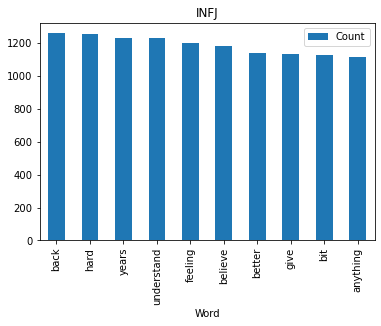

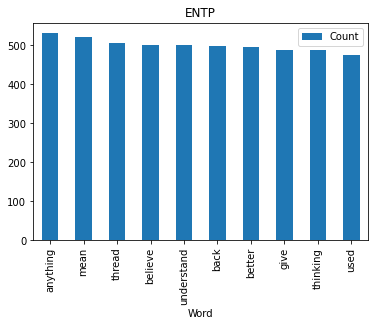

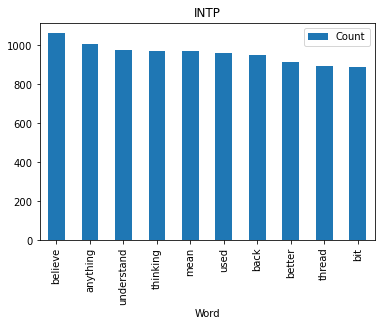

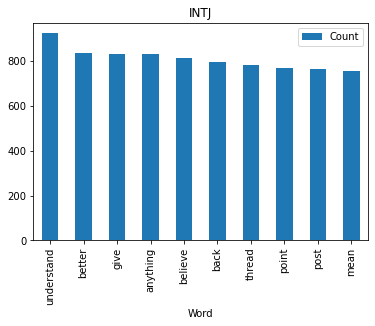

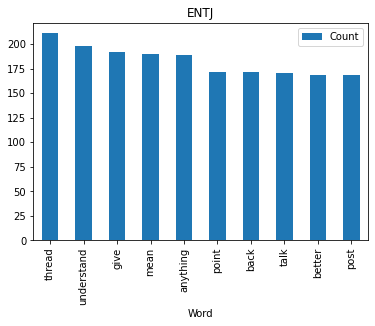

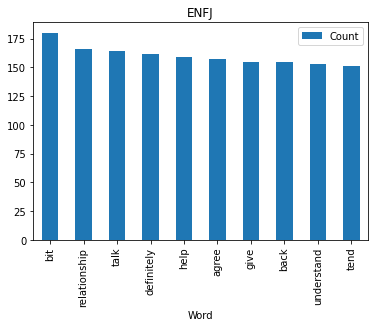

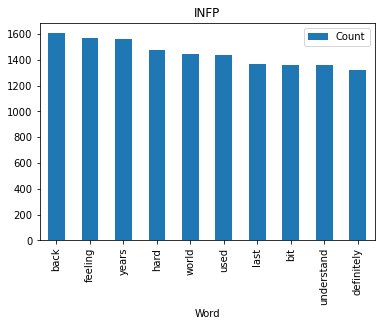

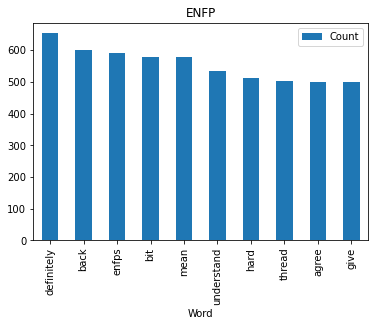

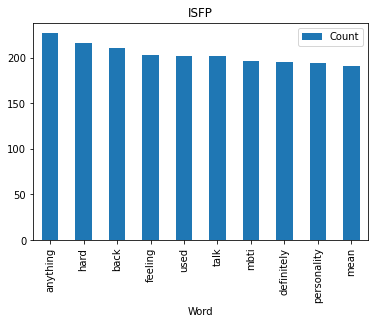

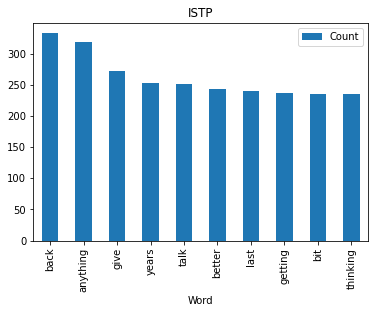

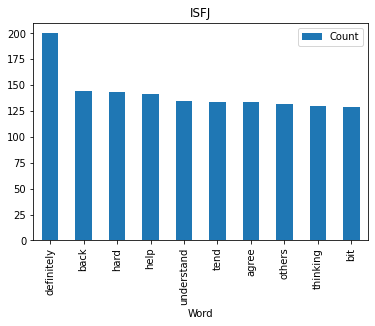

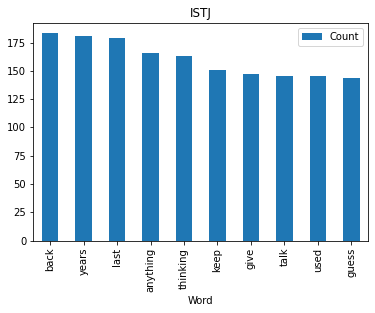

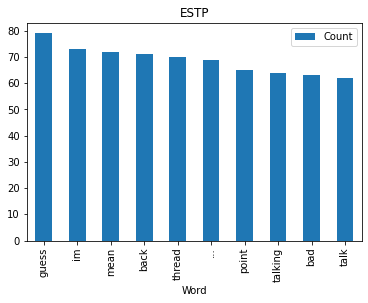

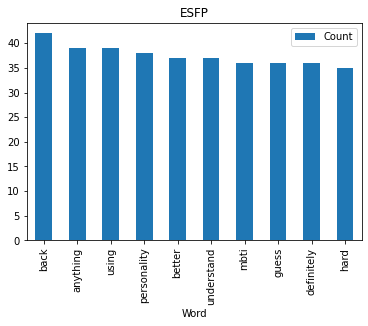

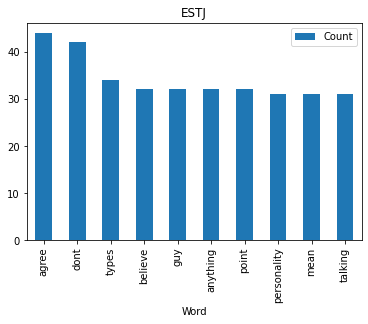

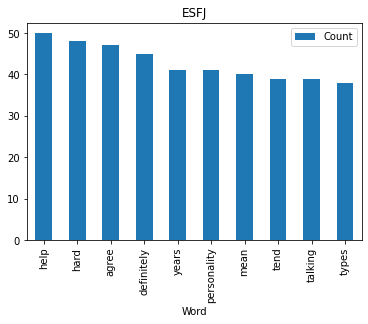

In [25]:
from collections import Counter 
import nltk
from nltk.corpus import stopwords
names = data['type'].unique()
t=0     
while t < len(names):
    for name in names:
        #combine the rows by type
        nameReturn = "".join(post for post in data[data["type"]== name].posts)
        nameReturn = nameReturn.lower()
        print('The top 10 words for the ' + name + ' personality are')
        split = nameReturn.split() 
        filtered_words = [word for word in split if word not in stopWords]
        counter = Counter(filtered_words)
        most_occur = counter.most_common(10) 
        print(name)
        df = pd.DataFrame(most_occur, columns = ['Word', 'Count'])
        df.plot.bar(x='Word',y='Count', title=name)
        print(most_occur)
        t+=1

#### Create a graph to illustrate the count of top 10 most common words over all personality types

<AxesSubplot:title={'center':'Overall top words'}, xlabel='Word'>

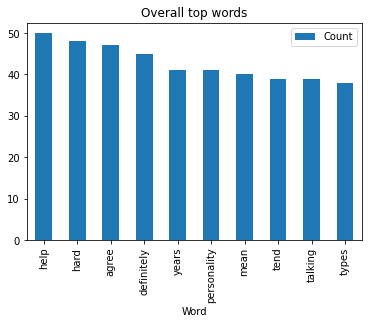

In [26]:
counter = Counter(filtered_words)
most_overall = counter.most_common(10) 
df = pd.DataFrame(most_overall, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count', title='Overall top words')